# Homework 3 

## Exploratory Data Analysis

### IRIS Data
We start by reading the data `IRIS.csv` and use the function `head` to see the structure of the data. 

In [6]:
iris_df <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv', fileEncoding = 'UTF-8')
head(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


From `head`, we can see that the data includes four numeric variables (`sepal_length`, `sepal_width`, `petal_length` and `petal_width`) and one string nominal variable `species`.

In this task we want to explore the following questions:

1. Is there a relationship between sepal dimensions and petal dimensions?
2. How are the sepal and petal dimensions distributed?
3. How are the different variables related to each other?

We start by exploring question 1. To draw some conclusions, we want to create a scatterplot as the one provided in the instructions. I craeted the plots using `ggplot` and the package `patchwork` to align the two plots together.

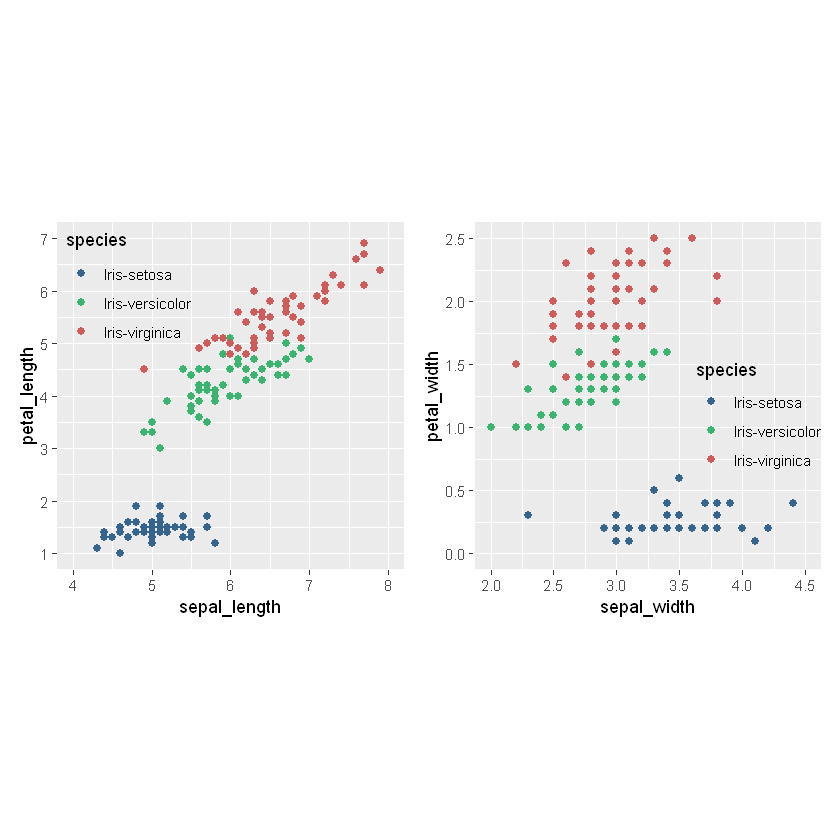

In [131]:
library(tidyverse, quietly = TRUE, warn.conflicts = FALSE)
library(patchwork)

# Adjust the colors of the points to match the ones provided. I googled for R color cheatsheet to find these (see link):
# https://www.nceas.ucsb.edu/sites/default/files/2020-04/colorPaletteCheatsheet.pdf
custom_colors <- c("Iris-setosa" = "steelblue4", "Iris-versicolor" = "mediumseagreen", "Iris-virginica" = "indianred")

left_plot <- ggplot(iris_df, aes(x = sepal_length, y = petal_length, color = species)) +
    geom_point(size = 2) +
    scale_color_manual(values = custom_colors) +
    scale_x_continuous(limits = c(4, 8), breaks = seq(4, 8, 1)) +
    scale_y_continuous(limits = c(1, 7), breaks = seq(1, 7, 1)) +
    theme(
        # Adjust the position of legend to match the plot provided in the instructions
        legend.position = c(0, 1),
        legend.justification = c("left", "top"),
        # Make the legend transparent to match the plot provided in the instructions
        legend.background = element_rect(fill = "transparent"),
        legend.key = element_rect(fill = "transparent"),
        # Adjust the aspect ratio to match the plot provided in the instructions
        aspect.ratio = 1
    )

right_plot <- ggplot(iris_df, aes(x = sepal_width, y = petal_width, color = species)) +
    geom_point(size = 2) +
    scale_color_manual(values = custom_colors) +
    scale_x_continuous(limits = c(2, 4.5), breaks = seq(2, 4.5, 0.5)) +
    scale_y_continuous(limits = c(0, 2.5), breaks = seq(0, 2.5, 0.5)) +
    theme(
        legend.position = c(1.05, 0.25),
        legend.justification = c("right", "bottom"),
        legend.background = element_rect(fill = "transparent"),
        legend.key = element_rect(fill = "transparent"),
        aspect.ratio = 1
    )

left_plot + right_plot

From the figure above, there is a clear positive linear trend between between the sepal and petal dimensions for the species Versicolor and Virginica. In contrast, for Setosa, the relationship between sepal and petal dimensions does not show a noticeable trend. That is, the data indicates that there is a relationship between sepal dimensions and petal dimensions, but this relationship is species-dependent.

We can now move on the the second question.

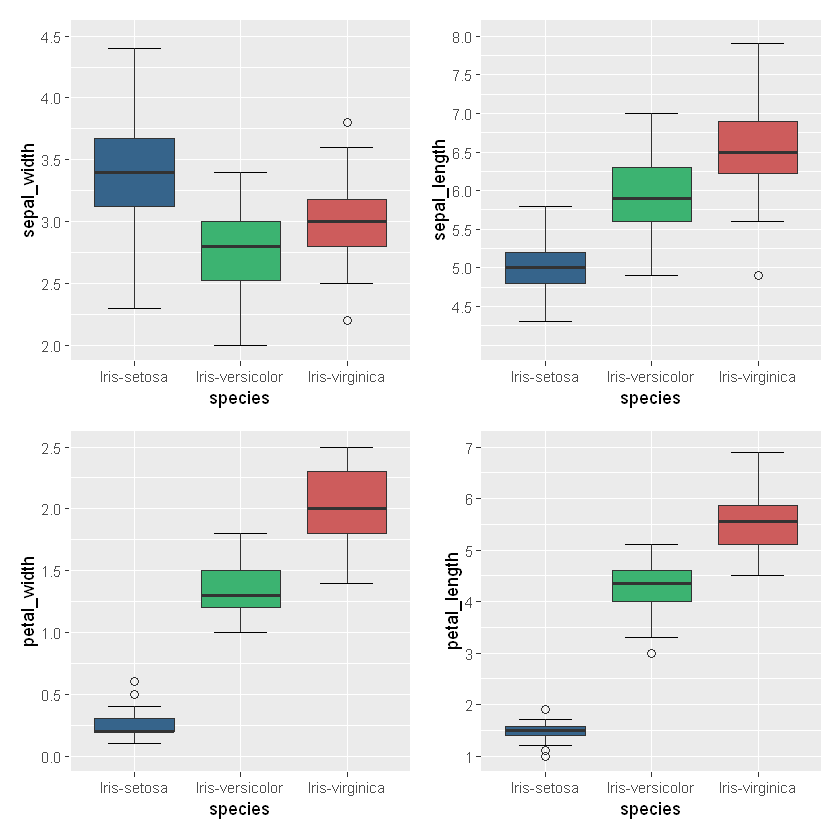

In [132]:
boxplot11 <- ggplot(iris_df, aes(x = species, y = sepal_width, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(2, 4.5), breaks = seq(2, 4.5, 0.5)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot12 <- ggplot(iris_df, aes(x = species, y = sepal_length, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(4.0, 8.0), breaks = seq(4.5, 8.0, 0.5)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot21 <- ggplot(iris_df, aes(x = species, y = petal_width, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(0.0, 2.5), breaks = seq(0.0, 2.5, 0.5)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot22 <- ggplot(iris_df, aes(x = species, y = petal_length, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(1, 7), breaks = seq(1, 7, 1)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot11 + boxplot12 + boxplot21 + boxplot22 + plot_layout(widths = c(2, 2))